In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import warnings

In [201]:
df1 = pd.DataFrame(pd.read_csv("NewsData_Cleaned.csv",index_col=0))
df2 = pd.DataFrame(pd.read_csv("MoreCleanedNews.csv",index_col=0))
df = pd.concat([df1, df2]).reset_index(drop=True)

### Add Leanings for Scores

In [202]:
def add_leaning(df):
    leanings = []
    for i in range(len(df)):
        if df.iloc[i,2] < -6:
            leanings.append('L')
        elif df.iloc[i,2] >= -6 and df.iloc[i,2] <= 6:
            leanings.append('C')
        elif df.iloc[i,2] > 6:
            leanings.append('R')
    df['Leanings'] = leanings
    return df

df = add_leaning(df)
df

,Source,URL,Bias,Text,Leanings
0,AlterNet,https://www.alternet.org/2018/09/michael-moore...,-28.75,michael moore detail fear trump may last presi...,L
1,AlterNet,https://www.alternet.org/2019/02/conservative-...,-20.00,conservative apologize ignore christian rightw...,L
2,AlterNet,https://www.alternet.org/2019/03/mueller-just-...,-18.67,mueller drop hint team could work something bi...,L
3,AlterNet,https://www.alternet.org/2019/03/trump-has-sol...,-26.25,trump sell farmer vote now race toward calamit...,L
4,AlterNet,https://www.alternet.org/2019/03/this-needs-to...,-27.00,need expose top intel democrat reveal kremlin ...,L
...,...,...,...,...,...
2001,The Blaze,https://www.theblaze.com/news/suicide-tips-in-...,0.00,pediatrician find wristslitte suicide tip spli...,C
2002,The Blaze,https://www.theblaze.com/news/doj-hundreds-to-...,-0.67,doj hundred charge capitol riot number crime m...,C
2003,The Blaze,https://www.theblaze.com/news/judge-sanctions-...,-0.67,judge hit trump attorney nearly 1 million sanc...,C
2004,The Blaze,https://www.theblaze.com/news/democrat-pray-fo...,-1.67,top house democrat say pray black trump suppor...,C


In [203]:
#df.to_csv('CleanedNewsData.csv') 

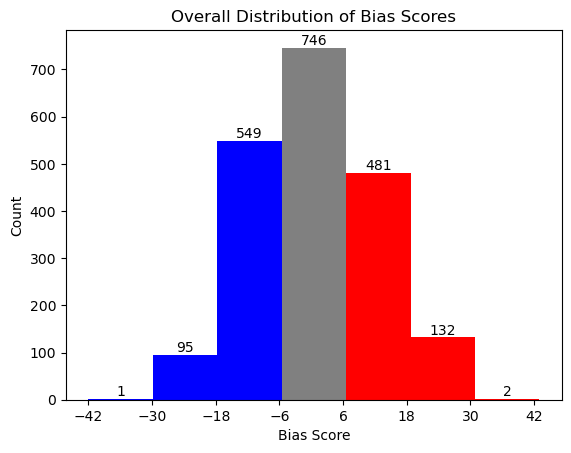

In [193]:
counts, edges, bars = plt.hist(df["Bias"],bins=7,range=(-42,43))
plt.bar_label(bars)
plt.title("Overall Distribution of Bias Scores")
plt.xlabel("Bias Score")
plt.ylabel("Count")
plt.xticks(range(-42,43,12))
for i in range(0,3):
    bars[i].set_facecolor('b')
for i in range(3,4):    
    bars[i].set_facecolor('gray')
for i in range(4, len(bars)):
    bars[i].set_facecolor('r')
plt.show()

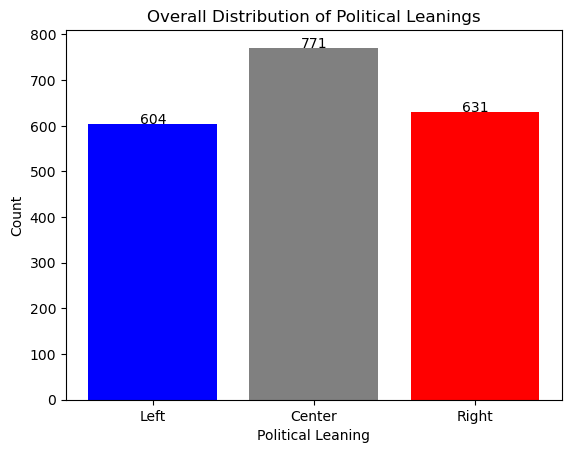

<Figure size 1200x1200 with 0 Axes>

In [194]:
x = ["Left", "Center", "Right"]
y = [len(df[df["Leanings"]=="L"]), len(df[df["Leanings"]=="C"]), len(df[df["Leanings"]=="R"])]

plt.bar(x,y,align='center', color = ['blue','grey','red'])
plt.title("Overall Distribution of Political Leanings")
plt.xlabel("Political Leaning")
plt.ylabel("Count")
plt.xticks(range(3))
for index, value in enumerate(y):
    plt.text(index, round(value,2), str(round(value,2)), ha='center')
plt.figure(figsize=(12,12))

plt.show()

                    Source  Counts
0                 Fox News     526
1                      CNN     353
2                Breitbart     244
3                    MSNBC     191
4                      Vox     178
5              Daily Beast     173
6             Mother Jones      69
7                The Blaze      65
8             Daily Caller      54
9                 AlterNet      49
10                  Reason      43
11  The American Spectator      39
12           Democracy Now      22


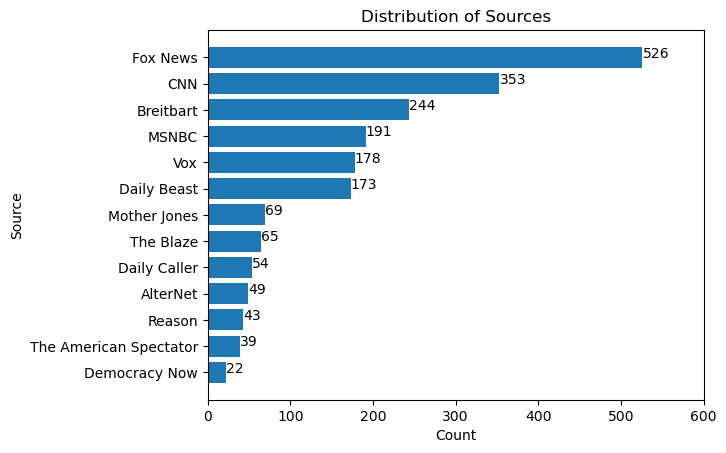

In [190]:
count_sources = df.groupby(['Source']).count().reset_index()
count_sources = count_sources.sort_values('URL', ascending=True)[['Source', 'Leanings']]
count_sources = count_sources.rename(columns={"Leanings":"Counts"})
print(count_sources.sort_values('Counts', ascending=False).reset_index(drop=True))

plt.barh(count_sources["Source"], count_sources["Counts"])
plt.xticks(range(0,601,100),ha='center')
plt.title("Distribution of Sources")
plt.xlabel("Count")
plt.ylabel("Source")
for index, value in enumerate(count_sources["Counts"]):
    plt.text(value, index, str(value))
plt.show()

                    Source       Bias
0                 AlterNet -15.346122
1            Democracy Now -14.359545
2             Mother Jones -13.101304
3                    MSNBC -11.945602
4              Daily Beast  -7.987168
5                      Vox  -7.178090
6                      CNN  -5.180340
7                   Reason   7.292791
8                 Fox News   8.367300
9             Daily Caller  11.030000
10               The Blaze  12.164308
11               Breitbart  12.250779
12  The American Spectator  18.647436


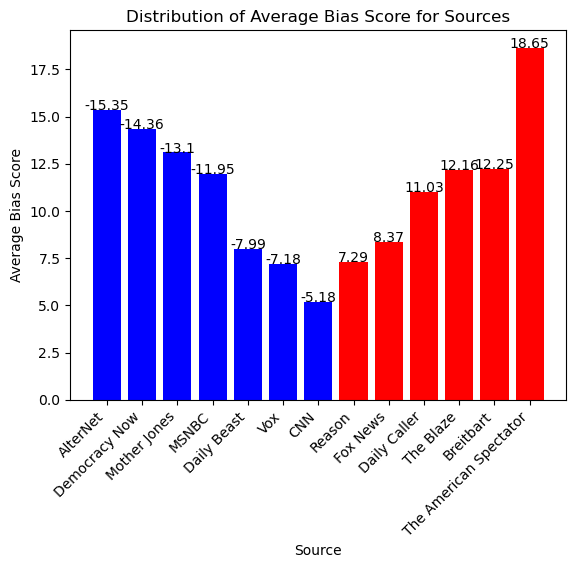

In [199]:
avg_sources = df.groupby(['Source']).mean().reset_index()
avg_sources = avg_sources.sort_values('Bias', ascending=True).reset_index(drop=True)
print(avg_sources)

colors=['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red','red','red']
plt.bar(avg_sources["Source"], abs(avg_sources["Bias"]), color=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Average Bias Score for Sources")
plt.xlabel("Source")
plt.ylabel("Average Bias Score")

for i in range(len(avg_sources["Bias"])):
    plt.text(i, abs(round(avg_sources["Bias"][i],2)), round(avg_sources["Bias"][i],2), ha = 'center')
warnings.filterwarnings('ignore')
plt.show()